In [226]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model

KNeighborsRegressor()

In [6]:
knn_model.n_neighbors

5

# KNN TAHMİNİ

In [7]:
knn_model.predict(X_train)

array([ 102.5   ,  952.    ,  904.    ,  325.5   ,  768.6666, 1180.6666,
        118.    ,   90.5   ,  708.6666,  840.4   , 1612.1142,  160.    ,
        982.    ,  771.    ,  716.6666,  745.    ,  670.    ,   79.5   ,
        247.5   ,  303.    ,  576.    ,  996.6666,  551.    ,  451.5   ,
         81.6   ,  962.5   ,  491.    ,  425.    ,   88.6   ,  463.    ,
         70.6   ,  680.3334, 1152.3332,   78.6   ,  433.3334,  103.5   ,
        281.2   ,  799.4   ,  106.5   ,   79.5   ,   79.5   ,  553.5   ,
        198.8334,  249.    ,  336.    , 1052.    ,  205.5   ,  126.3   ,
        637.    ,  602.    ,  498.    ,  248.    ,  322.    ,  160.    ,
       1103.6666,  148.4   ,  627.    ,  707.5   ,  220.    , 1472.1142,
        803.    ,  274.2   ,  588.    ,  487.5   ,  150.5   ,  158.3   ,
         84.    ,  694.5   ,  159.5   ,  303.5   ,  336.    ,  986.6666,
        737.5   ,  904.    , 1138.6666,  778.    ,  181.5   ,  498.    ,
        417.5   ,  840.4   ,  412.5   ,  510.    , 

In [8]:
knn_model.predict(X_test)

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [11]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


# KNN MODEL TUNİNG

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
knn_params ={"n_neighbors": np.arange(1,30,1)}

In [14]:
np.arange(1,30,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [15]:
knn= KNeighborsRegressor()    

In [16]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [17]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [19]:
knn_cv_model.best_params_["n_neighbors"]
#8. komşuluk değerinin en iyi değer olduğunu anlarız. Aşağıda daha güzel anlatılıyor.

8

In [20]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [21]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [22]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [24]:
#en az hata verecek komşu sayısı ile fit edilmiş final modelin test hatası:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# DESTEK VEKTÖR REGRESYONU(SVR)

In [25]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [26]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [27]:
from sklearn.svm import SVR

In [29]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [32]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [33]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [34]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [37]:
#ilk değere göre svr olarak maaş tahmini ?
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [38]:
y_pred = svr_model.predict(X_train)

InvalidIndexError: (slice(None, None, None), None)

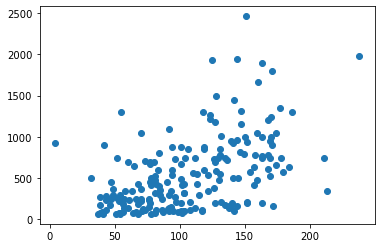

In [45]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [46]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [47]:
#ilk değere göre regresyon olarak maaş tahmini ?
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

InvalidIndexError: (slice(None, None, None), None)

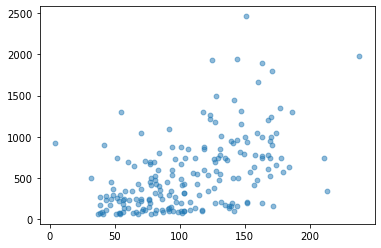

In [52]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

# SVR TAHMİN

In [53]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [54]:
svr_model.predict([[91]])

array([403.52804878])

In [55]:
y_pred = svr_model.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [57]:
svr_model

SVR(kernel='linear')

# SVR MODEL TUNİNG

In [58]:
svr_model

SVR(kernel='linear')

In [59]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [68]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [62]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [63]:
y_pred = svr_tuned.predict(X_test)

In [64]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# NONLİNEER SVR 

In [69]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [71]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

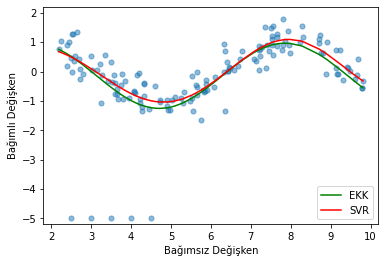

In [72]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [73]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [75]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

# NONLİNEER SVR TAHMİN

In [76]:
y_pred = svr_rbf.predict(X_test)

In [77]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

# NONLİNEER SVR MODEL TUNİNG

In [78]:
svr_rbf

SVR()

In [79]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [80]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [82]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [83]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# YAPAY SİNİR AĞLARI

In [33]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [36]:
X_train_scaled = scaler.transform(X_train)

In [37]:
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.neural_network import MLPRegressor

In [39]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [41]:
mlp_model.n_layers_

4

In [42]:
mlp_model.hidden_layer_sizes

(100, 20)

# YSA TAHMİN

In [43]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 67.45457151, 283.72791837, 249.98189938,  53.04032033,
        41.11768679])

In [44]:
y_pred = mlp_model.predict(X_test_scaled)

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

485.0328711545009

# YSA MODEL TUNİNG

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [56]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [57]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [58]:
mlp_cv_model.fit(X_train_scaled, y_train)

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\skle

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\skle

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\skle

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\skle

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\skle

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\skle

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Fatih Emre\anaconda3\lib\site-packages\skle

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [64]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

In [65]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [66]:
mlp_tuned.fit(X_train_scaled, y_train)

C:\Users\Fatih Emre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [67]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [68]:
#NLP Burada denediğimiz tüm modellerden daha düşük bir hata ile modeli uyguladı.
np.sqrt(mean_squared_error(y_test, y_pred))

356.5013551754868

# CART


In [119]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [120]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [85]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=3)
#Leaf nodes'i değiştirdikçe çizimimiz değişir.

In [86]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=3)

In [87]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

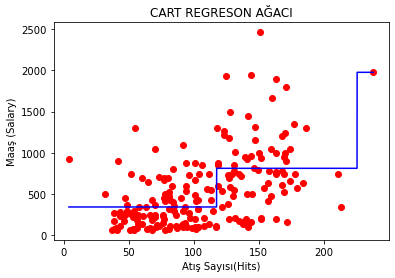

In [88]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [91]:
!pip install skompiler

In [92]:
from skompiler import skompile

In [96]:
pip install astor


Note: you may need to restart the kernel to use updated packages.


In [97]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else 813.0988 if x[0] <= 225.5 else 1975.0)



# CART TAHMİN

In [98]:
x = [91]

In [99]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [100]:
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [101]:
cart_model.predict([[91]])

array([345.20115517])

In [102]:
y_pred =cart_model.predict(X_test)

In [103]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0663148428844

# MODEL TUNİNG

In [121]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [122]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [123]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [124]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [131]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [132]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [141]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [142]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [143]:
y_pred = cart_tuned.predict(X_test)

In [144]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

# BAGGİNG TREES

In [145]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [146]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [147]:
bag_model.n_estimators

10

In [148]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=2028830587),
 DecisionTreeRegressor(random_state=1411697450),
 DecisionTreeRegressor(random_state=1304202199),
 DecisionTreeRegressor(random_state=1753020297),
 DecisionTreeRegressor(random_state=1184643089),
 DecisionTreeRegressor(random_state=842478450),
 DecisionTreeRegressor(random_state=2019599141),
 DecisionTreeRegressor(random_state=208405057),
 DecisionTreeRegressor(random_state=1715505063),
 DecisionTreeRegressor(random_state=82913250)]

In [149]:
#her bir ağaçtaki örneklere erişmek için
bag_model.estimators_samples_

[array([142, 164,   5,  80, 152,  86, 134,  85,  37, 190,  27, 119,  78,
        105,  79,  10,  30,  94,  30, 108,  23,  43, 135, 163,  52, 101,
        110, 133, 153,  28, 130, 133,  95, 124, 180,  52, 144, 146, 196,
         72,  33,   4,  38, 141,  72,  32, 165, 128,  46,  27,  72, 126,
        138, 114,  71,  18,  95,  80, 180, 196,  28,  57, 148, 182, 166,
         40,  26, 183,  34,  39, 141,  87, 196, 112, 100,  73,  58,  86,
        168, 127,  53,  99,  88,  36, 125, 110, 170, 131,  31,  60,  25,
         77, 191,  41,  16, 176, 120,  20, 118, 140, 183,  24,  94,  77,
        180,   6, 131, 125,  24,  97,  80, 141, 114, 163,  40, 190, 142,
         51,   4, 156,  92,  19,   2, 124,   0,  33, 105, 185, 181,  74,
         51,  53, 153, 157,  31, 180, 148, 156,  77, 123, 160, 125, 193,
        166,  53,  43, 131, 128, 177, 116,  11, 177, 125,  62,  90,  64,
         19,  50, 123,  12,  66, 108,  86,  14,  11, 133,  34,  11, 166,
         56, 155, 135,  79,  49,  47, 145, 139,  20

In [150]:
#ağaçların kullandığı değişkenler ve indexlerine eriştik.
bag_model.estimators_features_

[array([10,  8,  2,  2, 18, 12, 13, 12,  2,  4, 10,  1, 13, 16, 11, 16, 13,
         1, 10]),
 array([10, 15,  9,  4,  9, 11,  7,  6,  4,  0,  1, 16,  4, 10, 10, 15,  5,
        15, 12]),
 array([17,  0, 11, 14,  0,  9, 14, 12, 17, 18,  1, 11,  6, 11,  3, 11, 17,
         5,  8]),
 array([ 9,  8,  7,  1,  4,  5,  3,  0,  0, 17,  1,  2, 11,  2,  5, 15,  2,
        12, 12]),
 array([17,  7,  4, 13, 16,  8,  0,  2,  0,  7, 10,  2,  4, 10,  0, 10,  2,
        14, 11]),
 array([18,  3, 10,  3, 10, 10,  6,  6, 13, 14, 18,  3,  7,  2, 18,  9, 16,
         9,  4]),
 array([ 5,  8, 15,  0, 17,  7, 10, 15,  5, 13,  7, 14,  4, 10,  9, 11, 11,
        14,  4]),
 array([ 1, 14,  9,  8,  6, 11,  8,  6, 15,  5,  3,  3, 11, 15, 15,  0, 13,
         4, 16]),
 array([ 7, 14,  6, 11,  8, 12,  3, 14,  9,  5,  7,  6, 13, 13,  4,  3, 15,
         1,  9]),
 array([ 2,  4,  4,  2, 15,  7,  1, 13, 15, 18, 10,  9,  1,  6,  4,  6,  7,
         5, 10])]

In [157]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=2028830587)

# BAGGED TREES TAHMİN

In [158]:
y_pred = bag_model.predict(X_test)

In [174]:
np.sqrt(mean_squared_error(y_test, y_pred))

410.2505609679921

In [161]:
#ikinci ağaca gidip hatasının hesabını sormak istediğimizde:
iki_pred = bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [162]:
np.sqrt(mean_squared_error(y_test, iki_pred))

553.0077063007624

In [163]:
#yedinci ağaca gidip hatasının hesabını sormak istediğimizde:
yedi_pred = bag_model.estimators_[6].fit(X_train,y_train).predict(X_test)

In [164]:
np.sqrt(mean_squared_error(y_test, yedi_pred))

467.56302916675406

# BAGGED TREES MODEL TUNİNG

In [165]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [166]:
bag_params = {"n_estimators": range(2,20)}

In [167]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [168]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [169]:
bag_cv_model.best_params_

{'n_estimators': 3}

In [170]:
bag_tuned = BaggingRegressor( n_estimators = 3, random_state = 45)

In [171]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=3, random_state=45)

In [172]:
y_pred = bag_tuned.predict(X_test)

In [173]:
np.sqrt(mean_squared_error(y_test, y_pred))

410.2505609679921

# RANDOM FOREST

In [175]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [176]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
rf_model = RandomForestRegressor(random_state = 42)

In [178]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# RANDOM FOREST TAHMİN

In [179]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [180]:
y_pred = rf_model.predict(X_test)

In [181]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

# RANDOM FOREST MODEL TUNİNG

In [182]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
#Estimators ağaç sayısını ifade eder.

In [183]:
rf_model = RandomForestRegressor(random_state = 42)

In [184]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
#njobs parametresi, paralel olarak işlemlerin hızlıca halledilmesini sağlar
#bu parametre sayesinde bilgisayar full performans ile çalıştığı için, bilgisayarın soğutucusu bile çalışır.

In [185]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [187]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [188]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [189]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [190]:
y_pred = rf_tuned.predict(X_test)

In [191]:
np.sqrt(mean_squared_error(y_test, y_pred))

342.13916147787205

In [192]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

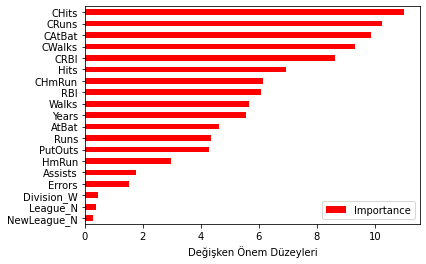

In [194]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")
#burada değişkenlerin y bağımlı değişkenin onlara olan bağ önemi gösterilmektedir.

# GRADİENT BOOSTİNG MACHİNES

In [195]:
from sklearn.ensemble import GradientBoostingRegressor

In [196]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

# GBM TAHMİN

In [197]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.90989664214936

# GBM MODEL TUNİNG

In [198]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [199]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [200]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.75}

In [201]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 3, 
                                      n_estimators = 200, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [202]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

334.5312868921862

In [203]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

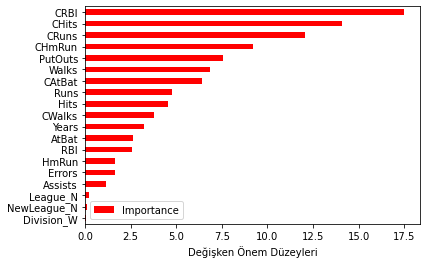

In [204]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBOOST

In [205]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [206]:
!pip install xgboost

In [207]:
import xgboost as xgb

In [208]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [209]:
from xgboost import XGBRegressor

In [210]:
xgb_model = XGBRegressor().fit(X_train, y_train)

# XGBOOST TAHMİN

In [211]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

# XGBOOST MODEL TUNİNG

In [212]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [213]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [214]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
        

In [215]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [216]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 100) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [217]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

343.6101991802883

# LİGHTGBM

In [227]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [228]:
!pip install lightgbm

^C


In [231]:
from lightgbm import LGBMRegressor

In [230]:
conda install -c conda-forge lightgbm


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: lightgbm


In [232]:
from lightgbm import LGBMRegressor

In [233]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# LİGHTGBM TAHMİN

In [234]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [235]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

# LİGHTGBM MODEL TUNİNG

In [236]:
lgbm_model

LGBMRegressor()

In [237]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [239]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [240]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [244]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 6, 
                           n_estimators = 20,
                          colsample_bytree = 0.5)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [245]:
y_pred = lgbm_tuned.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [246]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

# CATBOOST

In [247]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [248]:
!pip install catboost

In [250]:
from catboost import CatBoostRegressor

In [251]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 137ms	remaining: 2m 16s
1:	learn: 431.3923642	total: 139ms	remaining: 1m 9s
2:	learn: 424.8820360	total: 141ms	remaining: 46.9s
3:	learn: 418.2514904	total: 143ms	remaining: 35.5s
4:	learn: 412.6394021	total: 144ms	remaining: 28.7s
5:	learn: 406.6247020	total: 146ms	remaining: 24.2s
6:	learn: 400.5321206	total: 149ms	remaining: 21.1s
7:	learn: 394.6683437	total: 151ms	remaining: 18.7s
8:	learn: 388.2496484	total: 152ms	remaining: 16.8s
9:	learn: 382.9448842	total: 154ms	remaining: 15.2s
10:	learn: 377.2600080	total: 156ms	remaining: 14s
11:	learn: 372.4829606	total: 158ms	remaining: 13s
12:	learn: 366.6823437	total: 160ms	remaining: 12.1s
13:	learn: 362.6076230	total: 162ms	remaining: 11.4s
14:	learn: 358.0107745	total: 163ms	remaining: 10.7s
15:	learn: 353.2802665	total: 165ms	remaining: 10.2s
16:	learn: 348.5646265	total: 167ms	remaining: 9.67s
17:	learn: 343.6407912	total: 169ms	remaining: 9.21s
18:	learn: 339.2363847	total:

187:	learn: 132.0628764	total: 521ms	remaining: 2.25s
188:	learn: 131.8624217	total: 524ms	remaining: 2.25s
189:	learn: 131.3846390	total: 526ms	remaining: 2.24s
190:	learn: 131.0638781	total: 529ms	remaining: 2.24s
191:	learn: 130.4721276	total: 531ms	remaining: 2.23s
192:	learn: 129.9910319	total: 534ms	remaining: 2.23s
193:	learn: 129.7074214	total: 537ms	remaining: 2.23s
194:	learn: 129.0491404	total: 540ms	remaining: 2.23s
195:	learn: 128.6928621	total: 542ms	remaining: 2.22s
196:	learn: 128.5117514	total: 544ms	remaining: 2.22s
197:	learn: 128.4035709	total: 546ms	remaining: 2.21s
198:	learn: 127.9924182	total: 548ms	remaining: 2.21s
199:	learn: 127.7690317	total: 550ms	remaining: 2.2s
200:	learn: 127.6252249	total: 553ms	remaining: 2.2s
201:	learn: 127.4951417	total: 554ms	remaining: 2.19s
202:	learn: 127.0315349	total: 556ms	remaining: 2.18s
203:	learn: 126.7791475	total: 558ms	remaining: 2.17s
204:	learn: 126.4903107	total: 559ms	remaining: 2.17s
205:	learn: 126.0664803	total:

353:	learn: 76.1642615	total: 866ms	remaining: 1.58s
354:	learn: 76.1202523	total: 868ms	remaining: 1.58s
355:	learn: 75.9487132	total: 871ms	remaining: 1.58s
356:	learn: 75.6748479	total: 874ms	remaining: 1.57s
357:	learn: 75.4290864	total: 877ms	remaining: 1.57s
358:	learn: 75.0463849	total: 883ms	remaining: 1.58s
359:	learn: 74.9902381	total: 886ms	remaining: 1.57s
360:	learn: 74.5243875	total: 889ms	remaining: 1.57s
361:	learn: 74.1913065	total: 892ms	remaining: 1.57s
362:	learn: 73.8413359	total: 895ms	remaining: 1.57s
363:	learn: 73.7602119	total: 898ms	remaining: 1.57s
364:	learn: 73.3278135	total: 902ms	remaining: 1.57s
365:	learn: 72.9524336	total: 905ms	remaining: 1.57s
366:	learn: 72.6791856	total: 908ms	remaining: 1.56s
367:	learn: 72.4333577	total: 911ms	remaining: 1.56s
368:	learn: 72.1672937	total: 915ms	remaining: 1.56s
369:	learn: 71.9070276	total: 918ms	remaining: 1.56s
370:	learn: 71.5496196	total: 921ms	remaining: 1.56s
371:	learn: 71.3161902	total: 923ms	remaining:

557:	learn: 40.4475073	total: 1.56s	remaining: 1.24s
558:	learn: 40.2859957	total: 1.57s	remaining: 1.24s
559:	learn: 40.0262057	total: 1.57s	remaining: 1.23s
560:	learn: 39.9326350	total: 1.57s	remaining: 1.23s
561:	learn: 39.8735956	total: 1.57s	remaining: 1.23s
562:	learn: 39.7083019	total: 1.58s	remaining: 1.23s
563:	learn: 39.5379855	total: 1.58s	remaining: 1.22s
564:	learn: 39.3451301	total: 1.59s	remaining: 1.22s
565:	learn: 39.2041273	total: 1.59s	remaining: 1.22s
566:	learn: 38.9870162	total: 1.59s	remaining: 1.22s
567:	learn: 38.8638040	total: 1.59s	remaining: 1.21s
568:	learn: 38.7752116	total: 1.59s	remaining: 1.21s
569:	learn: 38.6530297	total: 1.6s	remaining: 1.21s
570:	learn: 38.5505372	total: 1.6s	remaining: 1.2s
571:	learn: 38.5134486	total: 1.6s	remaining: 1.2s
572:	learn: 38.3680902	total: 1.6s	remaining: 1.2s
573:	learn: 38.1897295	total: 1.61s	remaining: 1.19s
574:	learn: 38.1083536	total: 1.61s	remaining: 1.19s
575:	learn: 37.9229216	total: 1.61s	remaining: 1.19s


722:	learn: 24.4605667	total: 1.91s	remaining: 731ms
723:	learn: 24.3780491	total: 1.91s	remaining: 728ms
724:	learn: 24.3695387	total: 1.91s	remaining: 726ms
725:	learn: 24.2713928	total: 1.92s	remaining: 723ms
726:	learn: 24.2564573	total: 1.92s	remaining: 720ms
727:	learn: 24.1259045	total: 1.92s	remaining: 717ms
728:	learn: 24.0410925	total: 1.92s	remaining: 715ms
729:	learn: 23.9454740	total: 1.93s	remaining: 713ms
730:	learn: 23.9293944	total: 1.93s	remaining: 710ms
731:	learn: 23.8408373	total: 1.93s	remaining: 707ms
732:	learn: 23.7301307	total: 1.93s	remaining: 704ms
733:	learn: 23.6751178	total: 1.94s	remaining: 702ms
734:	learn: 23.5518474	total: 1.94s	remaining: 699ms
735:	learn: 23.5054838	total: 1.94s	remaining: 696ms
736:	learn: 23.4781040	total: 1.94s	remaining: 693ms
737:	learn: 23.3774725	total: 1.94s	remaining: 690ms
738:	learn: 23.3081022	total: 1.95s	remaining: 687ms
739:	learn: 23.2915892	total: 1.95s	remaining: 684ms
740:	learn: 23.2095735	total: 1.95s	remaining:

894:	learn: 15.4230904	total: 2.25s	remaining: 264ms
895:	learn: 15.3907978	total: 2.25s	remaining: 262ms
896:	learn: 15.3022423	total: 2.26s	remaining: 259ms
897:	learn: 15.2770800	total: 2.26s	remaining: 257ms
898:	learn: 15.2708396	total: 2.26s	remaining: 254ms
899:	learn: 15.2217814	total: 2.26s	remaining: 252ms
900:	learn: 15.2150872	total: 2.27s	remaining: 249ms
901:	learn: 15.1938758	total: 2.27s	remaining: 247ms
902:	learn: 15.1087389	total: 2.27s	remaining: 244ms
903:	learn: 15.0270836	total: 2.27s	remaining: 241ms
904:	learn: 14.9579009	total: 2.27s	remaining: 239ms
905:	learn: 14.9321713	total: 2.28s	remaining: 236ms
906:	learn: 14.9254894	total: 2.28s	remaining: 234ms
907:	learn: 14.8662999	total: 2.28s	remaining: 231ms
908:	learn: 14.7969088	total: 2.28s	remaining: 229ms
909:	learn: 14.7187437	total: 2.29s	remaining: 226ms
910:	learn: 14.6594229	total: 2.29s	remaining: 224ms
911:	learn: 14.6109629	total: 2.29s	remaining: 221ms
912:	learn: 14.5833869	total: 2.29s	remaining:

# CATBOOST TAHMİN

In [252]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

# CATBOOST MODEL TUNİNG

In [253]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [254]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [255]:
catb_cv_model.fit(X_train, y_train)
#45 DK SÜRDÜĞÜ İÇİN SALDIM

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [256]:
catb_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [266]:
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 442.4903140	total: 8.56ms	remaining: 8.56s
1:	learn: 440.4621805	total: 17ms	remaining: 8.49s
2:	learn: 438.5132091	total: 26.7ms	remaining: 8.87s
3:	learn: 436.2180377	total: 34.8ms	remaining: 8.67s
4:	learn: 434.0461579	total: 42.6ms	remaining: 8.48s
5:	learn: 431.8437770	total: 51.3ms	remaining: 8.51s
6:	learn: 430.1594587	total: 59.5ms	remaining: 8.44s
7:	learn: 428.0941830	total: 68.6ms	remaining: 8.51s
8:	learn: 426.0998774	total: 132ms	remaining: 14.5s
9:	learn: 424.0249067	total: 135ms	remaining: 13.4s
10:	learn: 422.1921868	total: 164ms	remaining: 14.7s
11:	learn: 420.2506764	total: 181ms	remaining: 14.9s
12:	learn: 418.3116383	total: 210ms	remaining: 15.9s
13:	learn: 416.2966847	total: 234ms	remaining: 16.5s
14:	learn: 414.5776175	total: 254ms	remaining: 16.7s
15:	learn: 412.8009394	total: 265ms	remaining: 16.3s
16:	learn: 410.9774146	total: 272ms	remaining: 15.7s
17:	learn: 409.1047417	total: 280ms	remaining: 15.2s
18:	learn: 407.6243957	total: 286ms	remaining: 14.

159:	learn: 246.6414875	total: 1.51s	remaining: 7.93s
160:	learn: 245.9710878	total: 1.52s	remaining: 7.92s
161:	learn: 245.2531651	total: 1.53s	remaining: 7.91s
162:	learn: 244.3669394	total: 1.53s	remaining: 7.88s
163:	learn: 243.5127155	total: 1.54s	remaining: 7.86s
164:	learn: 242.7095888	total: 1.55s	remaining: 7.83s
165:	learn: 242.0376740	total: 1.55s	remaining: 7.81s
166:	learn: 241.2252825	total: 1.56s	remaining: 7.79s
167:	learn: 240.5849477	total: 1.57s	remaining: 7.77s
168:	learn: 239.7800585	total: 1.58s	remaining: 7.75s
169:	learn: 239.1427178	total: 1.58s	remaining: 7.73s
170:	learn: 238.5203908	total: 1.59s	remaining: 7.71s
171:	learn: 237.7975333	total: 1.6s	remaining: 7.69s
172:	learn: 237.3602037	total: 1.6s	remaining: 7.64s
173:	learn: 236.6786338	total: 1.6s	remaining: 7.62s
174:	learn: 236.0202210	total: 1.61s	remaining: 7.59s
175:	learn: 235.3476701	total: 1.62s	remaining: 7.57s
176:	learn: 234.6718452	total: 1.62s	remaining: 7.55s
177:	learn: 233.8885269	total: 

322:	learn: 165.9563514	total: 2.81s	remaining: 5.9s
323:	learn: 165.6048040	total: 2.82s	remaining: 5.89s
324:	learn: 165.2834172	total: 2.83s	remaining: 5.88s
325:	learn: 164.8962448	total: 2.84s	remaining: 5.87s
326:	learn: 164.6262569	total: 2.84s	remaining: 5.85s
327:	learn: 164.3714077	total: 2.85s	remaining: 5.84s
328:	learn: 164.0279276	total: 2.85s	remaining: 5.82s
329:	learn: 163.6950660	total: 2.86s	remaining: 5.81s
330:	learn: 163.3639374	total: 2.87s	remaining: 5.8s
331:	learn: 162.9850439	total: 2.87s	remaining: 5.78s
332:	learn: 162.6397263	total: 2.88s	remaining: 5.76s
333:	learn: 162.2688052	total: 2.88s	remaining: 5.75s
334:	learn: 161.9076209	total: 2.89s	remaining: 5.74s
335:	learn: 161.6145358	total: 2.9s	remaining: 5.74s
336:	learn: 161.3414894	total: 2.91s	remaining: 5.73s
337:	learn: 161.0235120	total: 2.92s	remaining: 5.71s
338:	learn: 160.6820811	total: 2.92s	remaining: 5.71s
339:	learn: 160.3057652	total: 2.93s	remaining: 5.69s
340:	learn: 160.0320295	total: 

499:	learn: 119.4692821	total: 4.1s	remaining: 4.1s
500:	learn: 119.3949425	total: 4.12s	remaining: 4.1s
501:	learn: 119.2757248	total: 4.14s	remaining: 4.11s
502:	learn: 119.1466102	total: 4.15s	remaining: 4.1s
503:	learn: 118.9603349	total: 4.17s	remaining: 4.11s
504:	learn: 118.7318459	total: 4.18s	remaining: 4.1s
505:	learn: 118.5723044	total: 4.19s	remaining: 4.09s
506:	learn: 118.3677627	total: 4.19s	remaining: 4.08s
507:	learn: 118.3016336	total: 4.2s	remaining: 4.07s
508:	learn: 118.0639161	total: 4.21s	remaining: 4.06s
509:	learn: 117.8040530	total: 4.21s	remaining: 4.05s
510:	learn: 117.7566037	total: 4.22s	remaining: 4.04s
511:	learn: 117.5614328	total: 4.22s	remaining: 4.03s
512:	learn: 117.4239520	total: 4.23s	remaining: 4.02s
513:	learn: 117.3234982	total: 4.24s	remaining: 4s
514:	learn: 117.1492514	total: 4.24s	remaining: 4s
515:	learn: 116.9649623	total: 4.25s	remaining: 3.98s
516:	learn: 116.7689767	total: 4.25s	remaining: 3.98s
517:	learn: 116.6069525	total: 4.26s	rem

671:	learn: 93.8826542	total: 5.4s	remaining: 2.63s
672:	learn: 93.7949033	total: 5.41s	remaining: 2.63s
673:	learn: 93.6860967	total: 5.44s	remaining: 2.63s
674:	learn: 93.5794880	total: 5.46s	remaining: 2.63s
675:	learn: 93.4918227	total: 5.48s	remaining: 2.63s
676:	learn: 93.3896233	total: 5.49s	remaining: 2.62s
677:	learn: 93.3028217	total: 5.5s	remaining: 2.61s
678:	learn: 93.2060608	total: 5.5s	remaining: 2.6s
679:	learn: 93.0268037	total: 5.51s	remaining: 2.59s
680:	learn: 92.8643379	total: 5.51s	remaining: 2.58s
681:	learn: 92.7431070	total: 5.52s	remaining: 2.57s
682:	learn: 92.6613701	total: 5.53s	remaining: 2.56s
683:	learn: 92.4015024	total: 5.53s	remaining: 2.56s
684:	learn: 92.2993218	total: 5.54s	remaining: 2.55s
685:	learn: 92.1847517	total: 5.54s	remaining: 2.54s
686:	learn: 91.9796714	total: 5.55s	remaining: 2.53s
687:	learn: 91.9517394	total: 5.55s	remaining: 2.52s
688:	learn: 91.8181586	total: 5.56s	remaining: 2.51s
689:	learn: 91.6217954	total: 5.57s	remaining: 2.5

836:	learn: 75.2794591	total: 6.51s	remaining: 1.27s
837:	learn: 75.2137650	total: 6.52s	remaining: 1.26s
838:	learn: 75.0504232	total: 6.53s	remaining: 1.25s
839:	learn: 74.9302149	total: 6.54s	remaining: 1.25s
840:	learn: 74.8648877	total: 6.54s	remaining: 1.24s
841:	learn: 74.6702750	total: 6.55s	remaining: 1.23s
842:	learn: 74.6048553	total: 6.55s	remaining: 1.22s
843:	learn: 74.5503750	total: 6.56s	remaining: 1.21s
844:	learn: 74.5102854	total: 6.57s	remaining: 1.2s
845:	learn: 74.3754904	total: 6.57s	remaining: 1.2s
846:	learn: 74.2018788	total: 6.58s	remaining: 1.19s
847:	learn: 74.0332043	total: 6.59s	remaining: 1.18s
848:	learn: 73.9766979	total: 6.59s	remaining: 1.17s
849:	learn: 73.9078031	total: 6.6s	remaining: 1.16s
850:	learn: 73.7466684	total: 6.61s	remaining: 1.16s
851:	learn: 73.5579237	total: 6.61s	remaining: 1.15s
852:	learn: 73.5057752	total: 6.62s	remaining: 1.14s
853:	learn: 73.3248300	total: 6.62s	remaining: 1.13s
854:	learn: 73.1532992	total: 6.63s	remaining: 1.

In [267]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.82462611665545